In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
base = pd.read_csv('credit_card_clients.csv', header=1)

In [3]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [5]:
X = base.iloc[:, [1, 2, 3, 4, 5, 25]].values
X[:5]

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       [ 50000,      2,      2,      1,     37, 231334],
       [ 50000,      1,      2,      1,     57, 109339]], dtype=int64)

In [6]:
scaler = StandardScaler()

In [7]:
X = scaler.fit_transform(X)

C:\Users\ricar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    # Passar o valor da distância calculada através do atributo inertia_
    wcss.append(kmeans.inertia_)

In [9]:
 wcss

[180000.0,
 143649.0703324216,
 123753.55143537329,
 108636.95987288721,
 95861.28790760027,
 86984.46026868215,
 80306.33790232586,
 76128.99425541243,
 72237.24128888406,
 69016.24675321294]

Text(0,0.5,'WCSS')

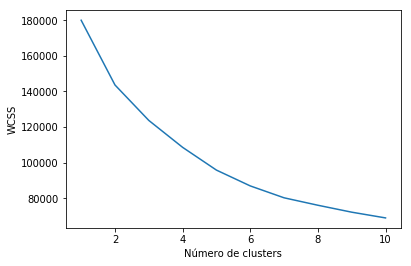

In [10]:
plt.plot(range(1,11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [11]:
kmeans = KMeans(n_clusters=4, random_state=0)

In [13]:
previsoes = kmeans.fit_predict(X)
previsoes

array([2, 3, 3, ..., 1, 2, 2])